In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from sklearn import model_selection, svm
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB

In [2]:
path = "train_fktp.txt"

In [3]:
data = pd.read_csv(path,sep=",",header=None)

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,157978748.0,50765420,20.064983,958073632,2019-08-01,2019-08-01,61,6108,3,1,...,9999,9999,98,9998,98,98,98,98,2,Sehat
1,95085112.0,26931775,2.626307,449590620P000054,2020-06-17,2020-06-17,51,5171,9,3,...,K297,"Gastritis, unspecified",98,9998,98,98,98,98,1,Belum_Sehat
2,224470578.0,227368233,1.051830,467490619P000001,2019-06-01,2019-06-01,35,3516,9,2,...,Z309,"Contraceptive management, unspecified",98,9998,98,98,98,98,1,Belum_Sehat
3,63871289.0,62313678,364.741455,254321219Y002368,2019-12-21,2019-12-21,34,3402,3,1,...,I10,Essential (primary) hypertension,98,9998,98,98,98,98,1,Belum_Sehat
4,29915626.0,113446188,1.050523,88681119P000020,2019-11-04,2019-11-04,35,3509,3,1,...,I110,Hypertensive heart disease with (congestive) h...,98,9998,98,98,98,98,1,Belum_Sehat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4056893,212666736.0,91270403,14.246229,1285820875,2020-07-29,2020-07-29,35,3505,9,3,...,9999,9999,98,9998,98,98,98,98,2,Sehat
4056894,30859241.0,30859241,3.886934,315641120P000514,2020-11-14,2020-11-14,35,3514,9,2,...,H269,"Cataract, unspecified",35,3514,9,2,14,99,1,Belum_Sehat
4056895,8859416.0,8859416,6.146070,962412926,2019-08-16,2019-08-16,11,1171,4,2,...,9999,9999,98,9998,98,98,98,98,2,Sehat
4056896,399491834.0,399491834,26.548826,273170420P000003,2020-04-01,2020-04-01,74,7402,3,1,...,K30,Dyspepsia,98,9998,98,98,98,98,1,Belum_Sehat


In [5]:
data.columns=["PSTV01","PSTV02","PSTV15","FKP02","FKP03","FKP04","FKP05","FKP06","FKP07","FKP08","FKP09","FKP010","FKP11","FKP12","FKP14","FKP14A","FKP15","FKP15A","FKP16","FKP17","FKP18","FKP19","FKP20","FKP21","FKP22","FKP13Class"]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4056898 entries, 0 to 4056897
Data columns (total 26 columns):
 #   Column      Dtype  
---  ------      -----  
 0   PSTV01      float64
 1   PSTV02      int64  
 2   PSTV15      float64
 3   FKP02       object 
 4   FKP03       object 
 5   FKP04       object 
 6   FKP05       int64  
 7   FKP06       int64  
 8   FKP07       int64  
 9   FKP08       int64  
 10  FKP09       int64  
 11  FKP010      int64  
 12  FKP11       float64
 13  FKP12       int64  
 14  FKP14       int64  
 15  FKP14A      object 
 16  FKP15       object 
 17  FKP15A      object 
 18  FKP16       int64  
 19  FKP17       int64  
 20  FKP18       int64  
 21  FKP19       int64  
 22  FKP20       int64  
 23  FKP21       int64  
 24  FKP22       int64  
 25  FKP13Class  object 
dtypes: float64(3), int64(16), object(7)
memory usage: 804.7+ MB


In [7]:
data

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,...,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
0,157978748.0,50765420,20.064983,958073632,2019-08-01,2019-08-01,61,6108,3,1,...,9999,9999,98,9998,98,98,98,98,2,Sehat
1,95085112.0,26931775,2.626307,449590620P000054,2020-06-17,2020-06-17,51,5171,9,3,...,K297,"Gastritis, unspecified",98,9998,98,98,98,98,1,Belum_Sehat
2,224470578.0,227368233,1.051830,467490619P000001,2019-06-01,2019-06-01,35,3516,9,2,...,Z309,"Contraceptive management, unspecified",98,9998,98,98,98,98,1,Belum_Sehat
3,63871289.0,62313678,364.741455,254321219Y002368,2019-12-21,2019-12-21,34,3402,3,1,...,I10,Essential (primary) hypertension,98,9998,98,98,98,98,1,Belum_Sehat
4,29915626.0,113446188,1.050523,88681119P000020,2019-11-04,2019-11-04,35,3509,3,1,...,I110,Hypertensive heart disease with (congestive) h...,98,9998,98,98,98,98,1,Belum_Sehat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4056893,212666736.0,91270403,14.246229,1285820875,2020-07-29,2020-07-29,35,3505,9,3,...,9999,9999,98,9998,98,98,98,98,2,Sehat
4056894,30859241.0,30859241,3.886934,315641120P000514,2020-11-14,2020-11-14,35,3514,9,2,...,H269,"Cataract, unspecified",35,3514,9,2,14,99,1,Belum_Sehat
4056895,8859416.0,8859416,6.146070,962412926,2019-08-16,2019-08-16,11,1171,4,2,...,9999,9999,98,9998,98,98,98,98,2,Sehat
4056896,399491834.0,399491834,26.548826,273170420P000003,2020-04-01,2020-04-01,74,7402,3,1,...,K30,Dyspepsia,98,9998,98,98,98,98,1,Belum_Sehat


In [8]:
data[["FKP14","FKP14A","FKP11"]].loc[data['FKP14'] == 9999]

,FKP14,FKP14A,FKP11
0,9999,NaN,12.0
6,9999,NaN,12.0
7,9999,NaN,12.0
8,9999,NaN,13.0
10,9999,NaN,13.0
...,...,...,...
4056890,9999,NaN,12.0
4056892,9999,NaN,13.0
4056893,9999,NaN,12.0
4056895,9999,NaN,13.0


Keterangan mengenai variabel ada pada metadata.xlsx

# Check missing value

<AxesSubplot: >

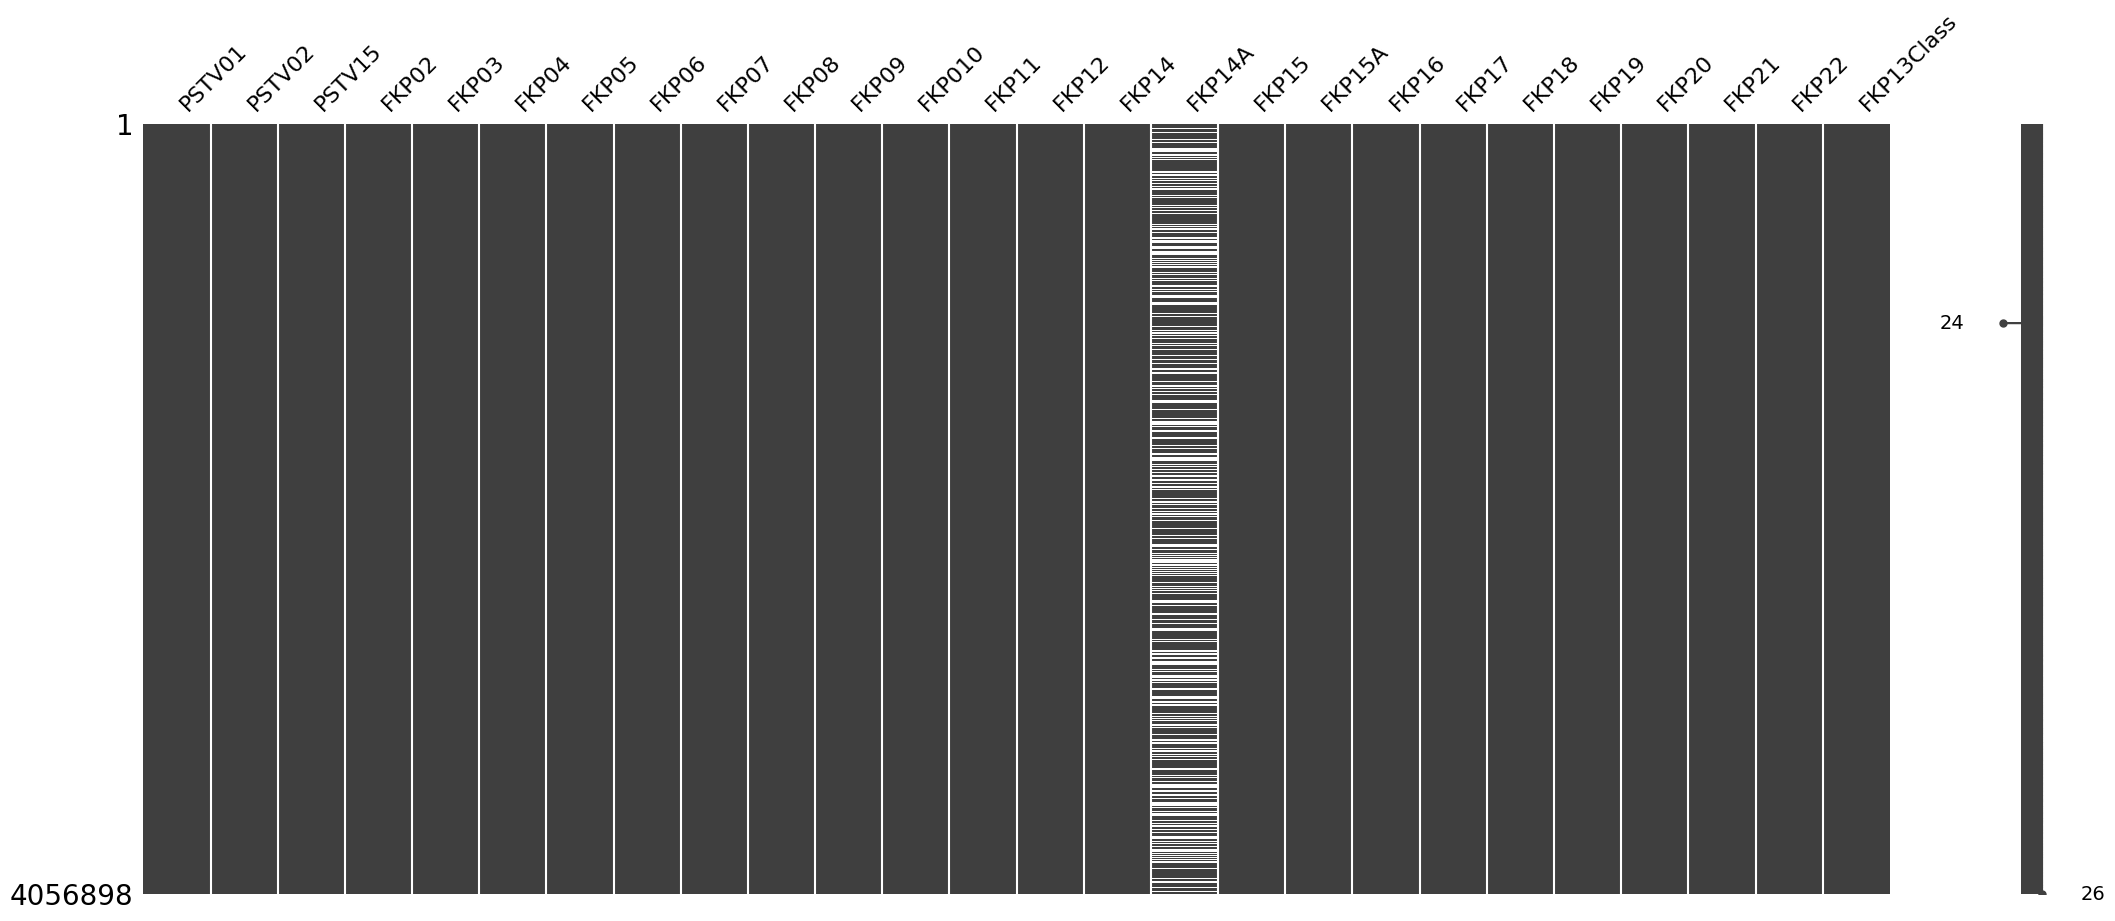

In [9]:
msno.matrix(data)

FKP11 untuk NA selalu pada status Home visit dan Konsultasi, dan Status diagnosanya (FKP14) selalu 9999 tidak ada disease ditemukan

In [10]:
data=data.fillna("unidentified")

<AxesSubplot: >

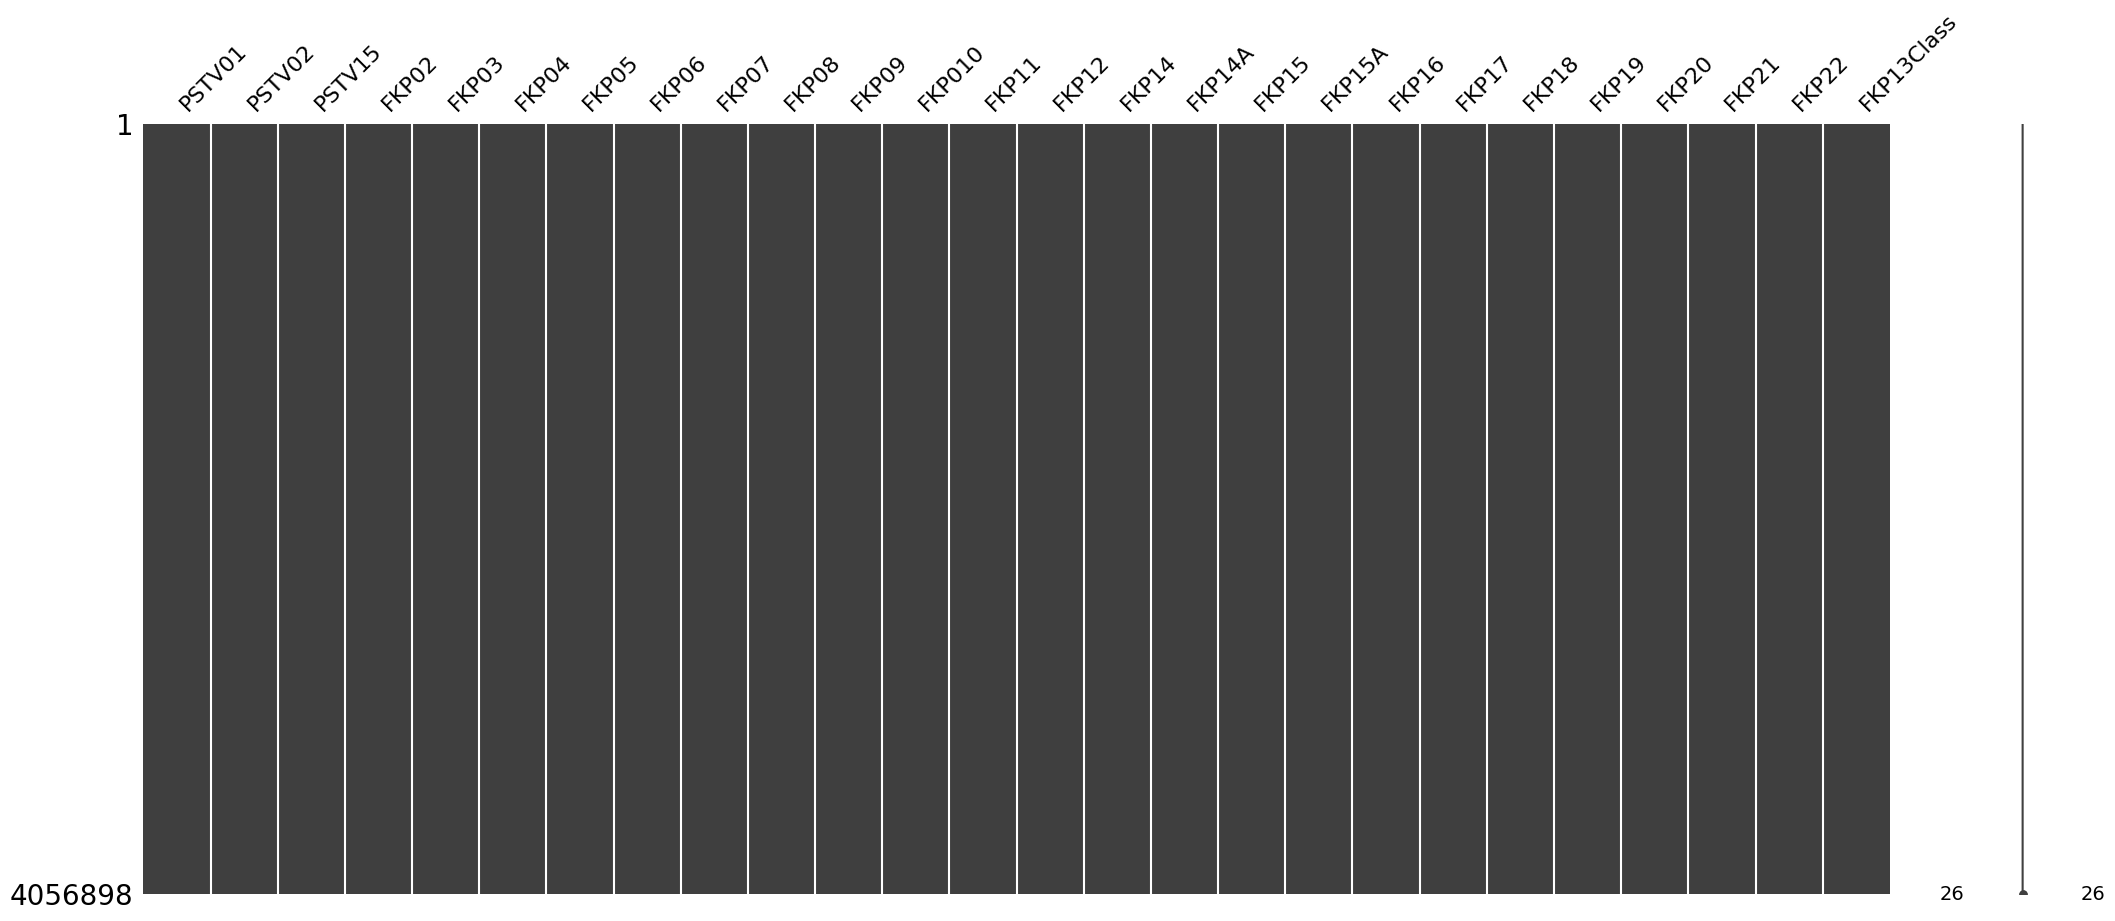

In [11]:
msno.matrix(data)

# EDA

In [12]:
corr1 = data[["PSTV15","FKP03","FKP04","FKP05","FKP13Class"]]

In [13]:
corr2 = data[["FKP06","FKP07","FKP08","FKP09","FKP010","FKP13Class"]]

In [14]:
corr3 = data[["FKP11","FKP12","FKP14","FKP14A","FKP15","FKP13Class"]]

In [15]:
corr4 = data[["FKP15A","FKP16","FKP17","FKP18","FKP19","FKP13Class"]]

In [16]:
corr5 = data[["FKP20","FKP21","FKP22","FKP13Class"]]

In [17]:
corr0 = data[["PSTV15","FKP03","FKP04","FKP05","FKP06","FKP07","FKP08","FKP09","FKP010","FKP11","FKP12","FKP14","FKP14A","FKP15","FKP15A","FKP16","FKP17","FKP18","FKP19","FKP20","FKP21","FKP22","FKP13Class"]]

## Corr plot

### Corr 1

In [18]:
corr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4056898 entries, 0 to 4056897
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   PSTV15      float64
 1   FKP03       object 
 2   FKP04       object 
 3   FKP05       int64  
 4   FKP13Class  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 154.8+ MB


In [19]:
CORR1_CAT = corr1.select_dtypes('object').columns
print(f"Object features: {', '.join(CORR1_CAT)}")

Object features: FKP03, FKP04, FKP13Class


In [20]:
corr1_sample=corr1.sample(100000)

In [21]:
corr1.nunique()

PSTV15        50390
FKP03           731
FKP04           736
FKP05            34
FKP13Class        2
dtype: int64

In [22]:
corr1_sample.nunique()

PSTV15        15003
FKP03           731
FKP04           731
FKP05            34
FKP13Class        2
dtype: int64

In [23]:
encoder = OrdinalEncoder()
corr1_sample[CORR1_CAT] = encoder.fit_transform(corr1_sample[CORR1_CAT])

In [24]:
corr1_sample

,PSTV15,FKP03,FKP04,FKP05,FKP13Class
2268467,9.874913,454.0,454.0,61,0.0
1907144,339.003662,282.0,282.0,33,1.0
1794876,143.396347,274.0,274.0,72,1.0
3790026,6.408188,519.0,519.0,33,0.0
3298574,14.881376,255.0,255.0,64,0.0
...,...,...,...,...,...
250218,146.232758,402.0,402.0,35,0.0
1666491,105.787628,104.0,104.0,13,0.0
2346575,36.768291,19.0,19.0,36,0.0
2990425,398.253143,720.0,720.0,33,1.0


#### Spearman

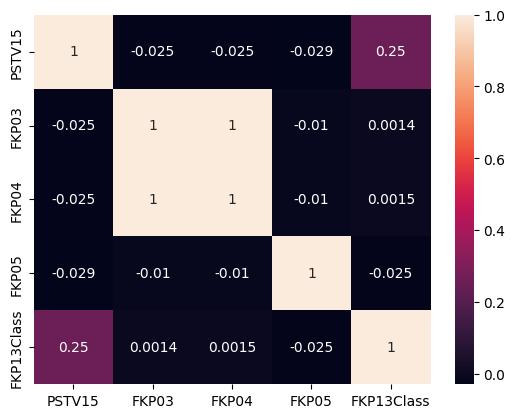

In [25]:
corr1_plot = corr1_sample.corr(method = 'spearman')
sns.heatmap(corr1_plot, annot = True)
plt.show()

#### Kendall

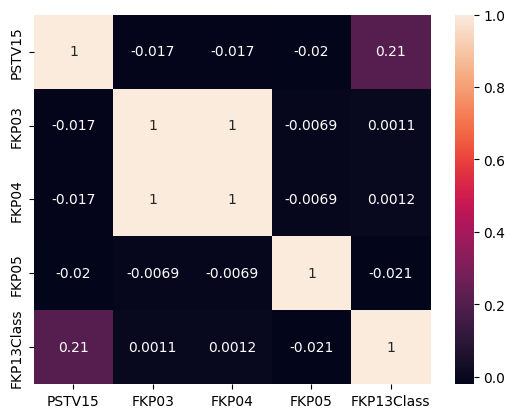

In [26]:
corr1_plot = corr1_sample.corr(method = 'kendall')
sns.heatmap(corr1_plot, annot = True)
plt.show()

#### pearson

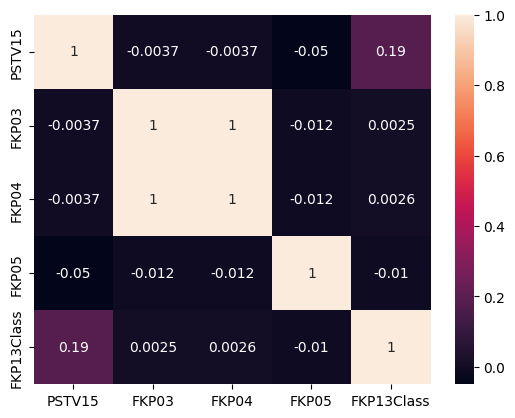

In [27]:
corr1_plot = corr1_sample.corr(method = 'pearson')
sns.heatmap(corr1_plot, annot = True)
plt.show()

### corr 2

In [28]:
corr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4056898 entries, 0 to 4056897
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   FKP06       int64 
 1   FKP07       int64 
 2   FKP08       int64 
 3   FKP09       int64 
 4   FKP010      int64 
 5   FKP13Class  object
dtypes: int64(5), object(1)
memory usage: 185.7+ MB


In [29]:
CORR2_CAT = corr2.select_dtypes('object').columns
print(f"Object features: {', '.join(CORR2_CAT)}")

Object features: FKP13Class


In [30]:
corr2_sample=corr2.sample(100000)

In [31]:
corr2.nunique()

FKP06         509
FKP07           9
FKP08           6
FKP09           9
FKP010          3
FKP13Class      2
dtype: int64

In [32]:
corr2_sample.nunique()

FKP06         500
FKP07           9
FKP08           6
FKP09           9
FKP010          3
FKP13Class      2
dtype: int64

In [33]:
encoder = OrdinalEncoder()
corr2_sample[CORR2_CAT] = encoder.fit_transform(corr2_sample[CORR2_CAT])

In [34]:
corr1_sample

,PSTV15,FKP03,FKP04,FKP05,FKP13Class
2268467,9.874913,454.0,454.0,61,0.0
1907144,339.003662,282.0,282.0,33,1.0
1794876,143.396347,274.0,274.0,72,1.0
3790026,6.408188,519.0,519.0,33,0.0
3298574,14.881376,255.0,255.0,64,0.0
...,...,...,...,...,...
250218,146.232758,402.0,402.0,35,0.0
1666491,105.787628,104.0,104.0,13,0.0
2346575,36.768291,19.0,19.0,36,0.0
2990425,398.253143,720.0,720.0,33,1.0


#### Spearman

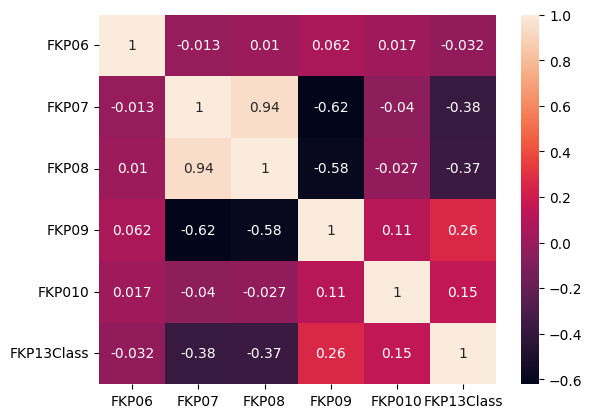

In [35]:
corr2_plot = corr2_sample.corr(method = 'spearman')
sns.heatmap(corr2_plot, annot = True)
plt.show()

#### Kendall

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5215: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


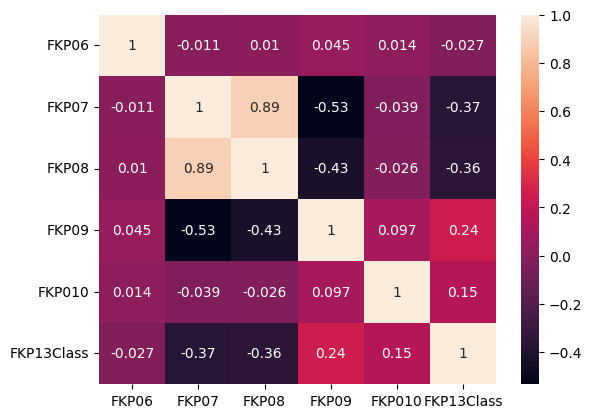

In [36]:
corr2_plot = corr2_sample.corr(method = 'kendall')
sns.heatmap(corr2_plot, annot = True)
plt.show()

#### Pearson

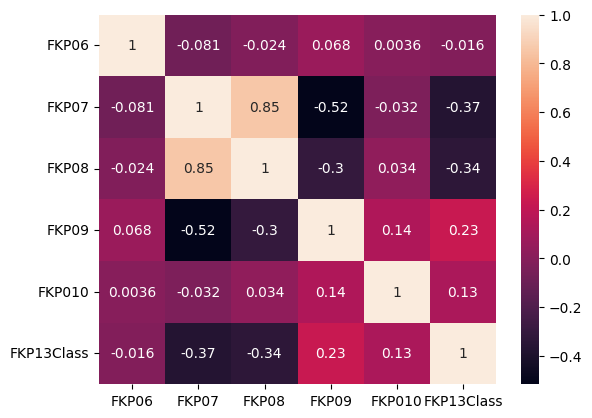

In [37]:
corr2_plot = corr2_sample.corr(method = 'pearson')
sns.heatmap(corr2_plot, annot = True)
plt.show()

### Corr 3

In [38]:
corr3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4056898 entries, 0 to 4056897
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   FKP11       object
 1   FKP12       int64 
 2   FKP14       int64 
 3   FKP14A      object
 4   FKP15       object
 5   FKP13Class  object
dtypes: int64(2), object(4)
memory usage: 185.7+ MB


In [39]:
CORR3_CAT = corr3.select_dtypes('object').columns
print(f"Object features: {', '.join(CORR3_CAT)}")

Object features: FKP11, FKP14A, FKP15, FKP13Class


In [40]:
corr3_sample=corr3.sample(100000)

In [41]:
corr3.nunique()

FKP11           27
FKP12            5
FKP14         1837
FKP14A        1837
FKP15         9665
FKP13Class       2
dtype: int64

In [42]:
corr3_sample.nunique()

FKP11           22
FKP12            5
FKP14         1115
FKP14A        1115
FKP15         3061
FKP13Class       2
dtype: int64

In [43]:
encoder = OrdinalEncoder()
corr3_sample[CORR3_CAT] = encoder.fit_transform(corr3_sample[CORR3_CAT])

In [44]:
corr3_sample

,FKP11,FKP12,FKP14,FKP14A,FKP15,FKP13Class
4003790,0.0,5,989,688.0,2008.0,0.0
642237,10.0,2,9999,1114.0,0.0,1.0
3847024,11.0,5,9999,1114.0,0.0,1.0
3447131,10.0,2,9999,1114.0,0.0,1.0
1191289,0.0,2,773,518.0,1397.0,0.0
...,...,...,...,...,...,...
3396879,0.0,4,755,501.0,1322.0,0.0
2581347,11.0,2,9999,1114.0,0.0,1.0
3839758,11.0,5,9999,1114.0,0.0,1.0
2671253,0.0,4,723,476.0,1246.0,0.0


#### Spearman

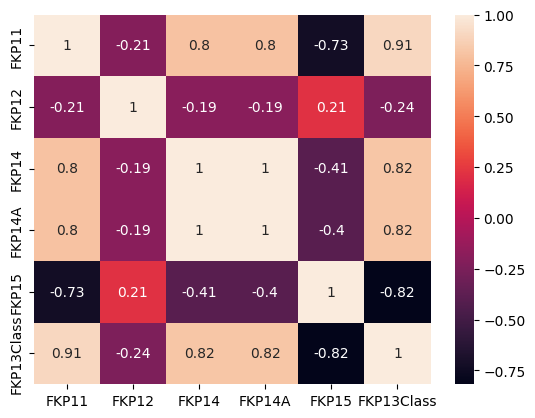

In [45]:
corr3_plot = corr3_sample.corr(method = 'spearman')
sns.heatmap(corr3_plot, annot = True)
plt.show()

#### Kendall

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5215: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


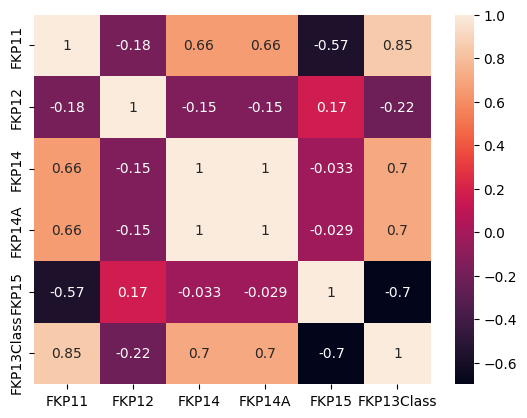

In [46]:
corr3_plot = corr3_sample.corr(method = 'kendall')
sns.heatmap(corr3_plot, annot = True)
plt.show()

#### Pearson

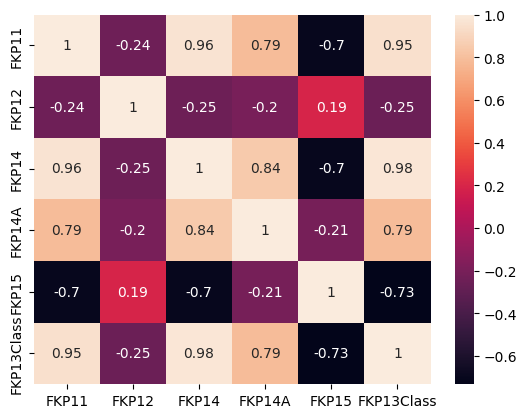

In [47]:
corr3_plot = corr3_sample.corr(method = 'pearson')
sns.heatmap(corr3_plot, annot = True)
plt.show()

### Corr 4

In [48]:
corr4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4056898 entries, 0 to 4056897
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   FKP15A      object
 1   FKP16       int64 
 2   FKP17       int64 
 3   FKP18       int64 
 4   FKP19       int64 
 5   FKP13Class  object
dtypes: int64(4), object(2)
memory usage: 185.7+ MB


In [49]:
CORR4_CAT = corr4.select_dtypes('object').columns
print(f"Object features: {', '.join(CORR4_CAT)}")

Object features: FKP15A, FKP13Class


In [50]:
corr4_sample=corr4.sample(100000)

In [51]:
corr4.nunique()

FKP15A        9660
FKP16           35
FKP17          482
FKP18           10
FKP19            3
FKP13Class       2
dtype: int64

In [52]:
corr4_sample.nunique()

FKP15A        3078
FKP16           35
FKP17          452
FKP18           10
FKP19            3
FKP13Class       2
dtype: int64

In [53]:
encoder = OrdinalEncoder()
corr4_sample[CORR4_CAT] = encoder.fit_transform(corr4_sample[CORR4_CAT])

In [54]:
corr4_sample

,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP13Class
1243211,0.0,98,9998,98,98,1.0
3285675,1.0,98,9998,98,98,0.0
1422294,857.0,98,9998,98,98,0.0
1732127,0.0,98,9998,98,98,1.0
3125761,846.0,32,3210,3,1,0.0
...,...,...,...,...,...,...
2004523,1080.0,98,9998,98,98,0.0
2407502,0.0,98,9998,98,98,1.0
241826,0.0,98,9998,98,98,1.0
2177787,0.0,98,9998,98,98,1.0


#### Spearman

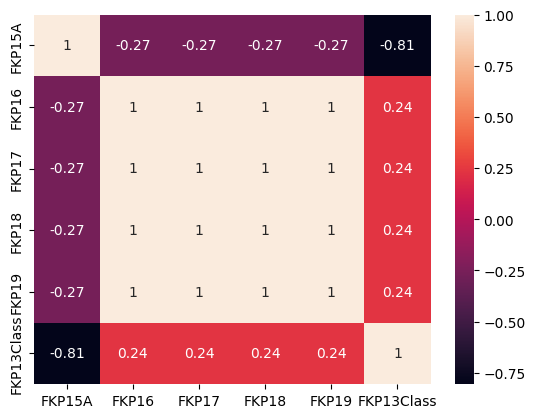

In [55]:
corr4_plot = corr4_sample.corr(method = 'spearman')
sns.heatmap(corr4_plot, annot = True)
plt.show()

#### Kendall

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5215: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


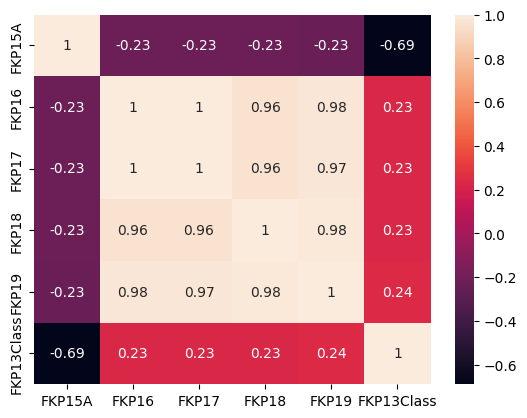

In [56]:
corr4_plot = corr4_sample.corr(method = 'kendall')
sns.heatmap(corr4_plot, annot = True)
plt.show()

#### pearson

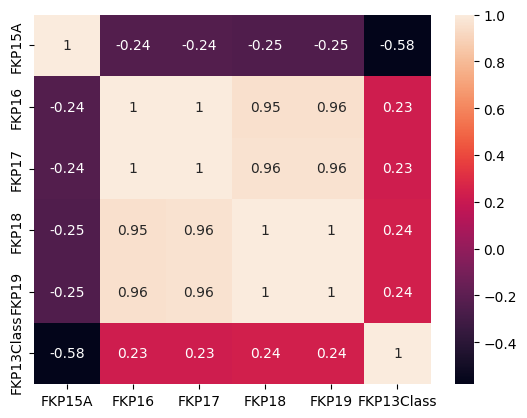

In [57]:
corr4_plot = corr4_sample.corr(method = 'pearson')
sns.heatmap(corr4_plot, annot = True)
plt.show()

### Corr 5

In [58]:
corr5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4056898 entries, 0 to 4056897
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   FKP20       int64 
 1   FKP21       int64 
 2   FKP22       int64 
 3   FKP13Class  object
dtypes: int64(3), object(1)
memory usage: 123.8+ MB


In [59]:
CORR5_CAT = corr5.select_dtypes('object').columns
print(f"Object features: {', '.join(CORR5_CAT)}")

Object features: FKP13Class


In [60]:
corr5_sample=corr5.sample(100000)

In [61]:
corr5.nunique()

FKP20         26
FKP21          2
FKP22          2
FKP13Class     2
dtype: int64

In [62]:
corr5_sample.nunique()

FKP20         24
FKP21          2
FKP22          2
FKP13Class     2
dtype: int64

In [63]:
encoder = OrdinalEncoder()
corr5_sample[CORR5_CAT] = encoder.fit_transform(corr5_sample[CORR5_CAT])

In [64]:
corr5_sample

,FKP20,FKP21,FKP22,FKP13Class
2753125,34,99,1,0.0
3013525,98,98,2,1.0
274670,98,98,2,1.0
915818,98,98,2,1.0
2356031,98,98,2,1.0
...,...,...,...,...
2443619,98,98,1,0.0
2698349,98,98,2,1.0
1452794,98,98,1,0.0
1222577,98,98,2,1.0


#### Spearman

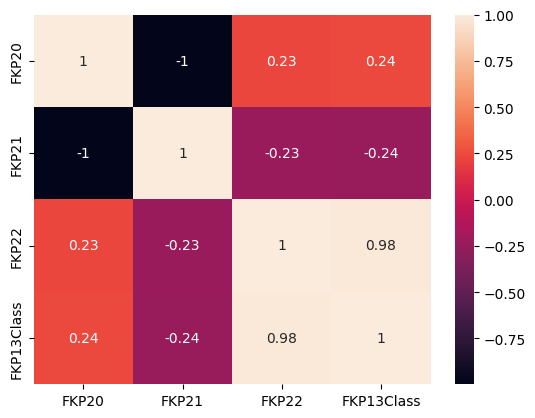

In [65]:
corr5_plot = corr5_sample.corr(method = 'spearman')
sns.heatmap(corr5_plot, annot = True)
plt.show()

#### Kendall

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5215: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


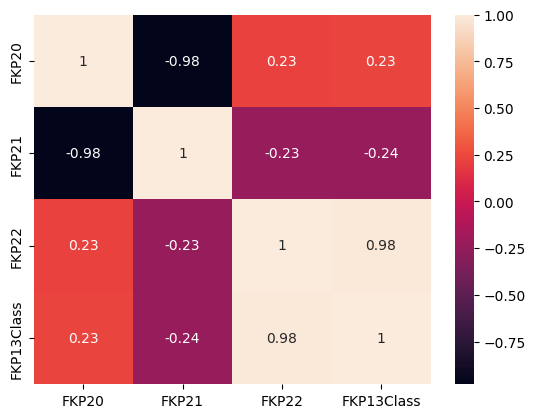

In [66]:
corr5_plot = corr5_sample.corr(method = 'kendall')
sns.heatmap(corr5_plot, annot = True)
plt.show()

#### Pearson

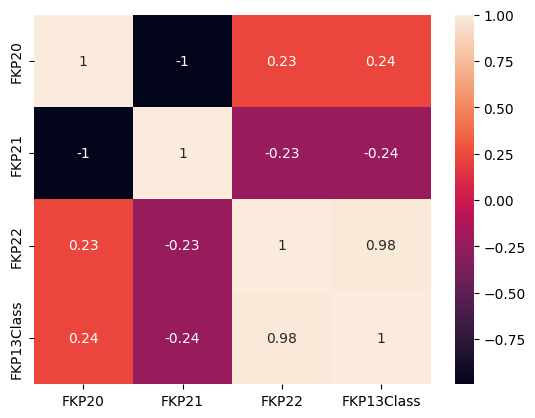

In [67]:
corr5_plot = corr5_sample.corr(method = 'pearson')
sns.heatmap(corr5_plot, annot = True)
plt.show()

## FKP05

<AxesSubplot: title={'center': 'Barplot Provinsi FKTP'}>

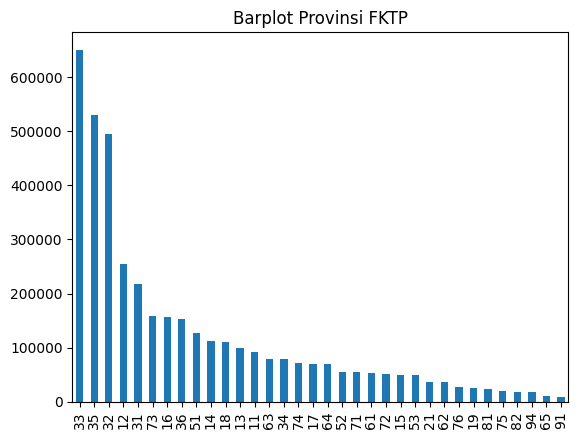

In [68]:
# Plot data FKP05
data["FKP05"].value_counts().plot(kind='bar',title="Barplot Provinsi FKTP")

In [69]:
data["FKP05"].nunique()

34

## FKP06

In [70]:
FKP06=data["FKP06"].value_counts()

In [71]:
FKP06=FKP06.head()

<AxesSubplot: title={'center': 'Barplot Kabupaten/Kota FKTP'}>

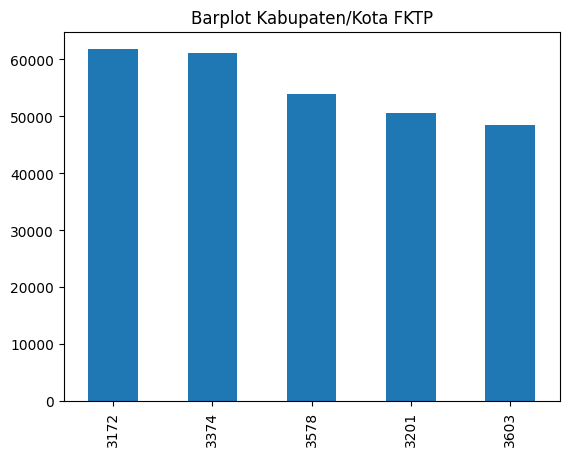

In [72]:
# Plot data FKP06
FKP06.plot(kind='bar',title="Barplot Kabupaten/Kota FKTP")

In [73]:
data["FKP06"].nunique()

509

## FKP07

In [74]:
data["FKP07"].nunique()

9

<AxesSubplot: title={'center': 'Barplot Kepemilikan FKTP'}>

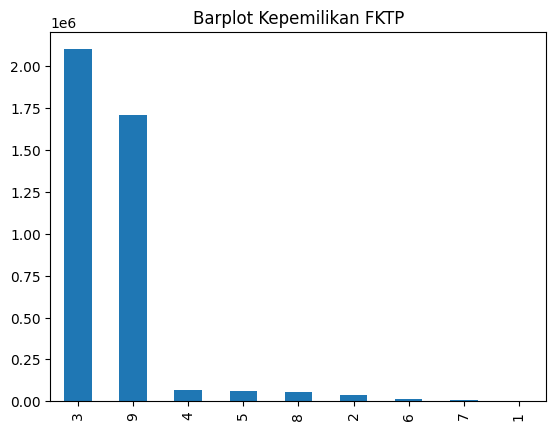

In [75]:
# Plot data FKP07
data["FKP07"].value_counts().plot(kind='bar',title="Barplot Kepemilikan FKTP")

## FKP08

In [76]:
data["FKP08"].nunique()

6

<AxesSubplot: title={'center': 'Barplot Jenis FKTP'}>

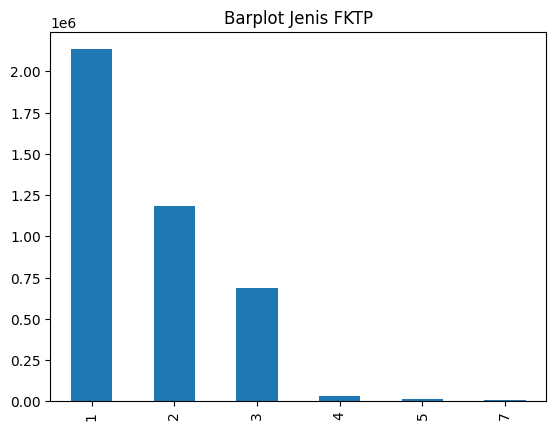

In [77]:
# Plot data FKP08
data["FKP08"].value_counts().plot(kind='bar',title="Barplot Jenis FKTP")

## FKP09

In [78]:
data["FKP09"].nunique()

9

<AxesSubplot: title={'center': 'Barplot Tipe FKTP'}>

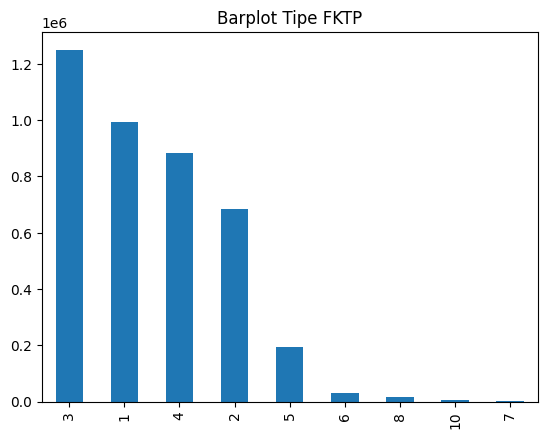

In [79]:
# Plot data FKP09
data["FKP09"].value_counts().plot(kind='bar',title="Barplot Tipe FKTP")

## FKP13Class

In [80]:
data["FKP13Class"].nunique()

2

<AxesSubplot: title={'center': 'Barplot Kelas Status Pulang Peserta'}>

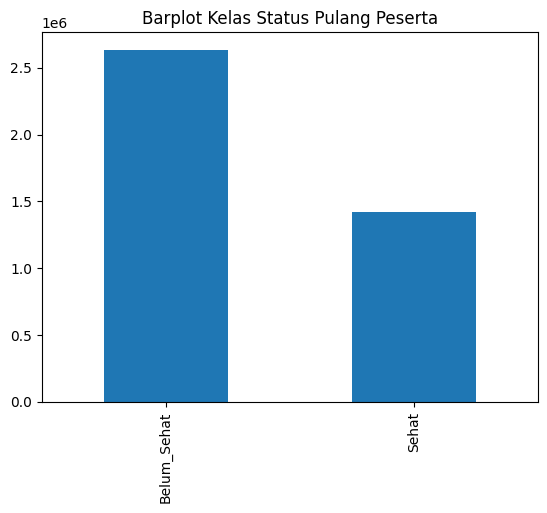

In [81]:
# Plot data FKP13Class
data["FKP13Class"].value_counts().plot(kind='bar',title="Barplot Kelas Status Pulang Peserta")

In [82]:
data["FKP13Class"].value_counts()

Belum_Sehat    2634511
Sehat          1422387
Name: FKP13Class, dtype: int64

# Undersampling

Under Sampling Sederhana

In [83]:
class_count_0, class_count_1 = data['FKP13Class'].value_counts()
# Separate class
class_0 = data[data['FKP13Class'] == "Belum_Sehat"]
class_1 = data[data['FKP13Class'] == "Sehat"]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (2634511, 26)
class 1: (1422387, 26)


In [84]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

In [85]:
test_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2844774 entries, 3502391 to 4056897
Data columns (total 26 columns):
 #   Column      Dtype  
---  ------      -----  
 0   PSTV01      float64
 1   PSTV02      int64  
 2   PSTV15      float64
 3   FKP02       object 
 4   FKP03       object 
 5   FKP04       object 
 6   FKP05       int64  
 7   FKP06       int64  
 8   FKP07       int64  
 9   FKP08       int64  
 10  FKP09       int64  
 11  FKP010      int64  
 12  FKP11       object 
 13  FKP12       int64  
 14  FKP14       int64  
 15  FKP14A      object 
 16  FKP15       object 
 17  FKP15A      object 
 18  FKP16       int64  
 19  FKP17       int64  
 20  FKP18       int64  
 21  FKP19       int64  
 22  FKP20       int64  
 23  FKP21       int64  
 24  FKP22       int64  
 25  FKP13Class  object 
dtypes: float64(2), int64(16), object(8)
memory usage: 586.0+ MB


In [86]:
test_under

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,...,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
3502391,32208044.0,73236657,9.034495,301660820P000137,2020-08-06,2020-08-06,35,3514,9,2,...,K297,"Gastritis, unspecified",98,9998,98,98,98,98,1,Belum_Sehat
2381791,102938611.0,102938611,65.151596,194461220P000339,2020-12-16,2020-12-16,14,1408,9,2,...,I10,Essential (primary) hypertension,98,9998,98,98,98,98,1,Belum_Sehat
2008682,20141033.0,49236282,40.129967,309490519Y001358,2019-05-16,2019-05-16,21,2171,9,2,...,R51,Headache,98,9998,98,98,98,98,1,Belum_Sehat
1674326,28603324.0,44311721,3.571777,231630219P000058,2019-02-18,2019-02-18,14,1471,9,2,...,K011,Impacted teeth,98,9998,98,98,98,98,1,Belum_Sehat
912336,31290864.0,13533820,32.251045,18400320P000791,2020-03-24,2020-03-24,63,6307,3,1,...,R51,Headache,98,9998,98,98,98,98,1,Belum_Sehat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4056890,18267669.0,90970599,299.083801,1042794066,2019-11-08,2019-11-08,73,7309,3,1,...,9999,9999,98,9998,98,98,98,98,2,Sehat
4056892,49303763.0,49303763,581.884521,989864751,2019-09-23,2019-09-23,31,3172,3,1,...,9999,9999,98,9998,98,98,98,98,2,Sehat
4056893,212666736.0,91270403,14.246229,1285820875,2020-07-29,2020-07-29,35,3505,9,3,...,9999,9999,98,9998,98,98,98,98,2,Sehat
4056895,8859416.0,8859416,6.146070,962412926,2019-08-16,2019-08-16,11,1171,4,2,...,9999,9999,98,9998,98,98,98,98,2,Sehat


<AxesSubplot: title={'center': 'Barplot Kelas Status Pulang Peserta'}>

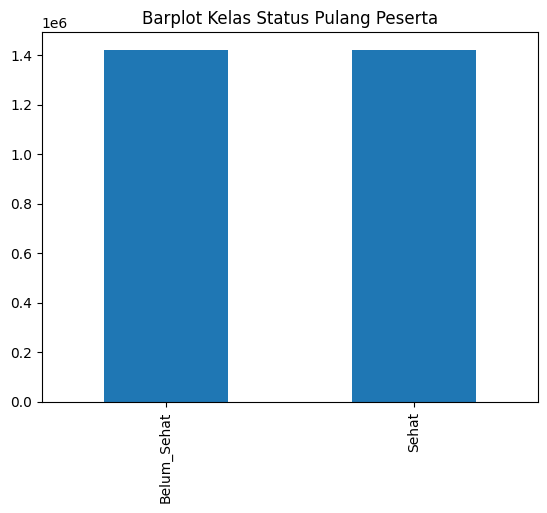

In [87]:
# Plot data FKP13Class
test_under["FKP13Class"].value_counts().plot(kind='bar',title="Barplot Kelas Status Pulang Peserta")

# Test Modelling

In [88]:
X = test_under[["PSTV15","FKP05","FKP06","FKP07","FKP08","FKP09","FKP010","FKP11","FKP12","FKP14","FKP14A","FKP15","FKP15A","FKP16","FKP17","FKP18","FKP19","FKP20","FKP21","FKP22"]]

In [89]:
Y = test_under[["FKP13Class"]]

In [90]:
CAT =  X.select_dtypes('object').columns
print(f"Object features: {', '.join(CAT)}")

Object features: FKP11, FKP14A, FKP15, FKP15A


Digunakan encoding ordinal untuk menghemat memory karena apabila menggunakan onehotencoder 
akan memunculkan terlalu banyak variabel dummy

In [91]:
X[CAT]=X[CAT].astype(str)

/tmp/ipykernel_590/827102915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[CAT]=X[CAT].astype(str)


In [92]:
X[CAT] = encoder.fit_transform(X[CAT])

/tmp/ipykernel_590/4108444573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[CAT] = encoder.fit_transform(X[CAT])


In [93]:
Y[["FKP13Class"]] = encoder.fit_transform(Y[["FKP13Class"]])

/tmp/ipykernel_590/489932146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[["FKP13Class"]] = encoder.fit_transform(Y[["FKP13Class"]])


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,stratify=Y, test_size=0.25)

In [95]:
X_train.shape

(2133580, 20)

In [96]:
X_test.shape

(711194, 20)

In [97]:
y_train.shape

(2133580, 1)

In [98]:
y_test.shape

(711194, 1)

## Random Forest

In [99]:
model=RandomForestClassifier().fit(X_train, y_train)

/tmp/ipykernel_590/1971728962.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=RandomForestClassifier().fit(X_train, y_train)


In [100]:
# Get Parameter Model
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [101]:
# Predict the model
predicted=model.predict(X_test)

In [102]:
# Check Classification report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    355597
         1.0       1.00      1.00      1.00    355597

    accuracy                           1.00    711194
   macro avg       1.00      1.00      1.00    711194
weighted avg       1.00      1.00      1.00    711194



In [103]:
importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = test_under.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) FKP11                          0.217903
 2) FKP09                          0.183917
 3) FKP010                         0.169090
 4) FKP18                          0.162818
 5) FKP12                          0.103353
 6) FKP07                          0.093001
 7) FKP06                          0.032473
 8) FKP05                          0.008696
 9) FKP03                          0.008639
10) FKP04                          0.005833
11) FKP08                          0.002892
12) PSTV02                         0.002577
13) FKP15                          0.002091
14) FKP02                          0.001919
15) FKP15A                         0.001840
16) FKP17                          0.001136
17) FKP14A                         0.000765
18) PSTV15                         0.000750
19) FKP16                          0.000201
20) FKP14                          0.000106


## Multinom Bayes

In [104]:
# Built the model
model2=MultinomialNB().fit(X_train, y_train)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [105]:
# Get Parameter Model
model2.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [106]:
# Predict the model
predicted2=model2.predict(X_test)

In [107]:
# Check Classification report
print(classification_report(y_test,predicted2))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99    355597
         1.0       1.00      0.97      0.98    355597

    accuracy                           0.99    711194
   macro avg       0.99      0.99      0.99    711194
weighted avg       0.99      0.99      0.99    711194



## Tanpa Under Sampling

In [108]:
X2 = data[["PSTV15","FKP05","FKP06","FKP07","FKP08","FKP09","FKP010","FKP11","FKP12","FKP14","FKP14A","FKP15","FKP15A","FKP16","FKP17","FKP18","FKP19","FKP20","FKP21","FKP22"]]

In [109]:
Y2 = data[["FKP13Class"]]

In [110]:
X2[CAT]=X2[CAT].astype(str)

/tmp/ipykernel_590/439126391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2[CAT]=X2[CAT].astype(str)


In [111]:
X2[CAT] = encoder.fit_transform(X2[CAT])

/tmp/ipykernel_590/4106701430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2[CAT] = encoder.fit_transform(X2[CAT])


In [112]:
Y2[["FKP13Class"]] = encoder.fit_transform(Y2[["FKP13Class"]])

/tmp/ipykernel_590/3898794808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y2[["FKP13Class"]] = encoder.fit_transform(Y2[["FKP13Class"]])


In [113]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2,stratify=Y2, test_size=0.25)

In [114]:
model3=RandomForestClassifier().fit(X_train2, y_train2)

/tmp/ipykernel_590/3243245962.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3=RandomForestClassifier().fit(X_train2, y_train2)


In [115]:
# Get Parameter Model
model3.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [116]:
# Predict the model
predicted3=model3.predict(X_test2)

In [117]:
# Check Classification report
print(classification_report(y_test2,predicted3))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    658628
         1.0       1.00      1.00      1.00    355597

    accuracy                           1.00   1014225
   macro avg       1.00      1.00      1.00   1014225
weighted avg       1.00      1.00      1.00   1014225



In [118]:
importances3 = model3.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances3)[::-1]
 
feat_labels = test_under.columns[1:]
 
for f in range(X_train2.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances3[sorted_indices[f]]))

 1) FKP010                         0.205211
 2) FKP12                          0.183734
 3) FKP11                          0.180327
 4) FKP18                          0.152065
 5) FKP09                          0.114903
 6) FKP07                          0.097314
 7) FKP06                          0.023359
 8) FKP05                          0.013295
 9) FKP03                          0.009194
10) FKP04                          0.007596
11) FKP08                          0.003336
12) PSTV02                         0.002288
13) FKP14A                         0.001915
14) FKP02                          0.001600
15) FKP15                          0.001348
16) FKP14                          0.000971
17) FKP17                          0.000701
18) PSTV15                         0.000616
19) FKP16                          0.000133
20) FKP15A                         0.000094


In [119]:
data[["FKP11","FKP010","FKP18","FKP13Class"]]

,FKP11,FKP010,FKP18,FKP13Class
0,12.0,1,98,Sehat
1,1.0,1,98,Belum_Sehat
2,3.0,1,98,Belum_Sehat
3,1.0,1,98,Belum_Sehat
4,1.0,1,98,Belum_Sehat
...,...,...,...,...
4056893,12.0,1,98,Sehat
4056894,1.0,1,9,Belum_Sehat
4056895,13.0,1,98,Sehat
4056896,1.0,1,98,Belum_Sehat


?????akurasi nya tidak berbeda setelah undersampling dan sebelum -_-

## KNN

In [120]:
model5=KNeighborsClassifier().fit(X_train, y_train)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [121]:
# Get Parameter Model
model5.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [122]:
# Predict the model
predicted5=model5.predict(X_test)

In [123]:
# Check Classification report
print(classification_report(y_test,predicted5))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    355597
         1.0       0.99      0.99      0.99    355597

    accuracy                           0.99    711194
   macro avg       0.99      0.99      0.99    711194
weighted avg       0.99      0.99      0.99    711194



## MLPClassifier Sklearn

In [124]:
model6=MLPClassifier(hidden_layer_sizes=(20,2),max_iter = 100,activation = 'relu',solver = 'adam').fit(X_train, y_train)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [125]:
# Get Parameter Model
model6.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (20, 2),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [126]:
# Predict the model
predicted6=model6.predict(X_test)

In [127]:
# Check Classification report
print(classification_report(y_test,predicted6))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99    355597
         1.0       1.00      0.97      0.98    355597

    accuracy                           0.99    711194
   macro avg       0.99      0.99      0.99    711194
weighted avg       0.99      0.99      0.99    711194



## Ringkasan F1 Score

In [128]:
print("F1-Score Random Forest: ",f1_score(y_test,predicted))
print("F1-Score MN Naive Bayes: ",f1_score(y_test,predicted2))
print("F1-Score RF tanpa undersampling: ",f1_score(y_test2,predicted3))
print("F1-Score KNN: ",f1_score(y_test,predicted5))
print("F1-Score MLP Classifier Sklearn: ",f1_score(y_test,predicted6))

F1-Score Random Forest:  0.997314811298329
F1-Score MN Naive Bayes:  0.9849902737202058
F1-Score RF tanpa undersampling:  0.9968177653422133
F1-Score KNN:  0.9901575415047685
F1-Score MLP Classifier Sklearn:  0.984991679487582
